 # STEPS FOR EDA
 
 1. DATA INGESTION
 
 2. EDA OF THE DATA
 
 3. PROCESSING OF THE DATA
 
 4. MODEL EVALUATION

### DATA INGESTION

- IMPORTING THE REQUIRED LIBRARY SUCH AS PANDAS, NUMPY,MATPLOTLIB, ETC
- LOADING THE DATA 
- LOADING THE TIME SERIES INTO PANDAS DATAFRAME
- SETTING THE DATETIME COLUMN AS THE INDEX OF THE DATAFRAME
- CHECKING THE DATATYPE OF THE INDEX AND CONVERT IT TO THE DATAFRAME IF NESESSARY

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('TSLA.CSV')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
# Univariate Analysis

data[["Date","Close"]]

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [5]:
# taking the date and close into another variable named stock_data

stock_data = data[["Date","Close"]]

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
# to change the date datatype from object(string) to proper value

pd.to_datetime(stock_data.Date)

0     2019-05-21
1     2019-05-22
2     2019-05-23
3     2019-05-24
4     2019-05-28
         ...    
753   2022-05-16
754   2022-05-17
755   2022-05-18
756   2022-05-19
757   2022-05-20
Name: Date, Length: 758, dtype: datetime64[ns]

In [8]:
# it change the type of the date into datetime format
# storing into stock_data["Date"]

stock_data["Date"] = pd.to_datetime(stock_data.Date)

In [9]:
# cheking the data once again
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
# setting the date variable into index

stock_data.set_index("Date")

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [11]:
stock_data = stock_data.set_index("Date")

In [12]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [13]:
# WHY WE CONVERT THE DATE COLUMN INTO INDEX

# 1. TO RETRIVING OF THE DATA WILL BE EASIER
# 2. VISUALIZATION WILL BE EASIER

### EDA OF THE DATA

- SUMMARY STATISTICS

1. COMPUTING SUMMARY STATISTICS SUCH AS MEAN, MEDIAN, MODE STANDARD DEVIATION

- VISUALIZE THE TIME SERIES DATA

1. PLOTTING THE TIME SERIES DATA
2. PLOT THE ROLLING MEAN AND ROLLING STANDARD DEVATION OF THE TIME SERIES DATA
3. DECOMPOSE THE TIME SERIES DATA WITH AND CHECK FOR ANY TRENDS,SEASIONALITY, TRENDS ETC
4. PLOT THE DECOMPOSED COMPONENTS FOR A BETTER UNDERSTANDING OF THE DATA

- STATIONARITY CHECK

1. CHECKING FOR SEASONALITY
2. CHECKING FOR THE SATTIONARITY OF THE TIME SERIES DATA USING THE AUGMENTED DICKEY-FULLER TEST

- CHECKING FOR AUTOCORRELATION
1. PLOT THE AUTOCORRELATION FUNCTION (ACF) AND PARTIAL AUTOCORRELATION (PACF) TO IDENTIFY THE THE ORDER OF THE ARIMA MODEL

- OUTLIER DETECTION 
1. DETECT AND HANDLE OUTLIER USING STATISTICAL METHODS OR MACHINE LEARNING TECHNIQUES

- CHECK FOR AUTOCORRELATION
1. PLOT THE AUTOCORRELATION FUNCTION (ACF) AND PATIAL CORRELATION FUNCTION (PACF) TO IDENTIFY THE ORDER OF THE ARIMA MODEL 

In [14]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [15]:
stock_data.head(5)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


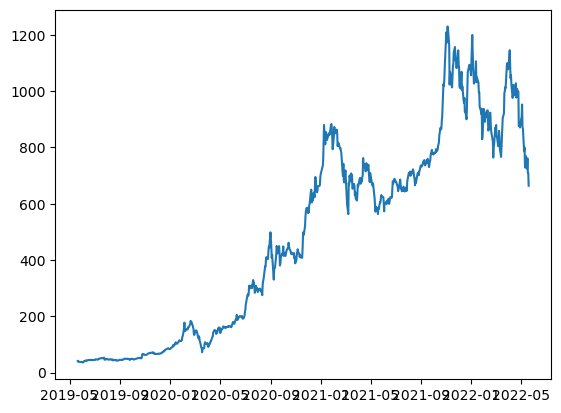

In [16]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

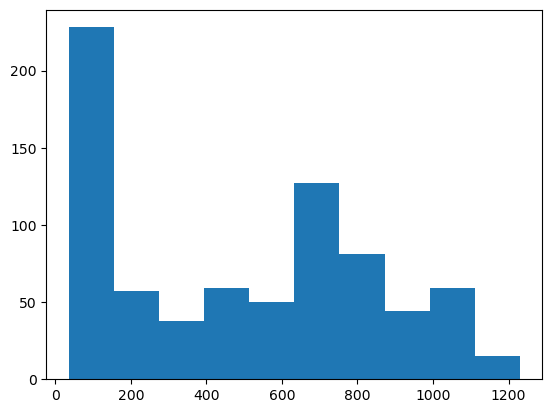

In [17]:
plt.hist(stock_data.Close)

<AxesSubplot: xlabel='Close', ylabel='Density'>

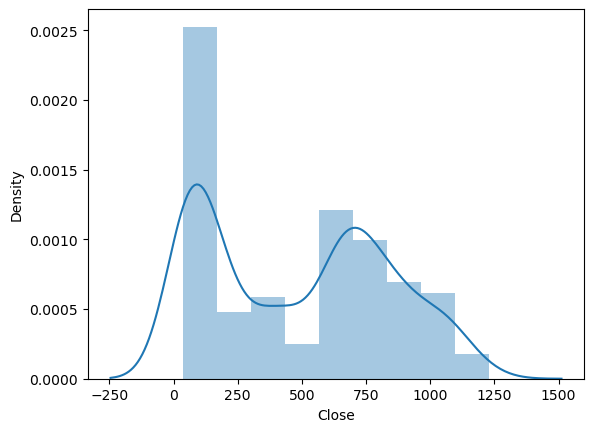

In [18]:
import seaborn as sns
sns.distplot(stock_data.Close)

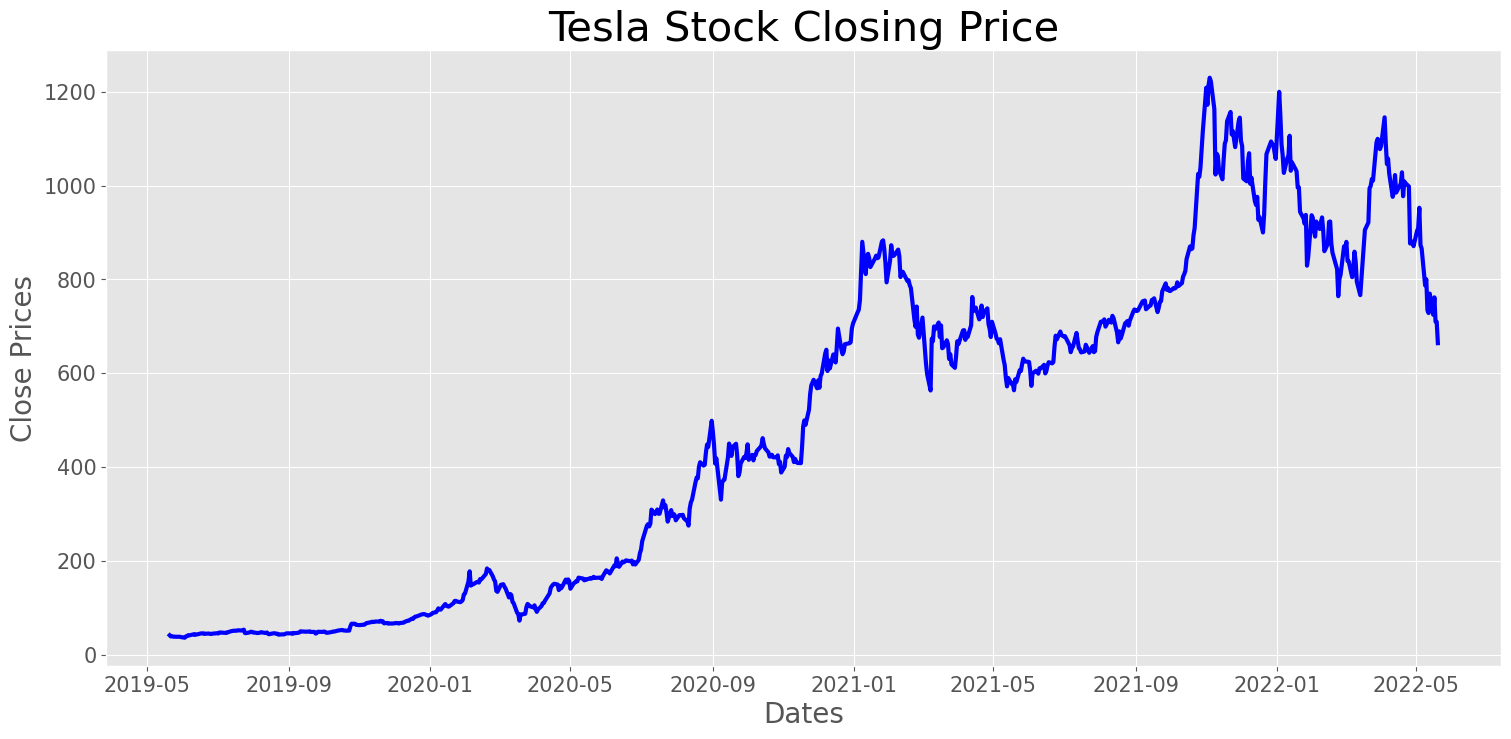

In [19]:
# plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price', fontsize=30)
plt.show()

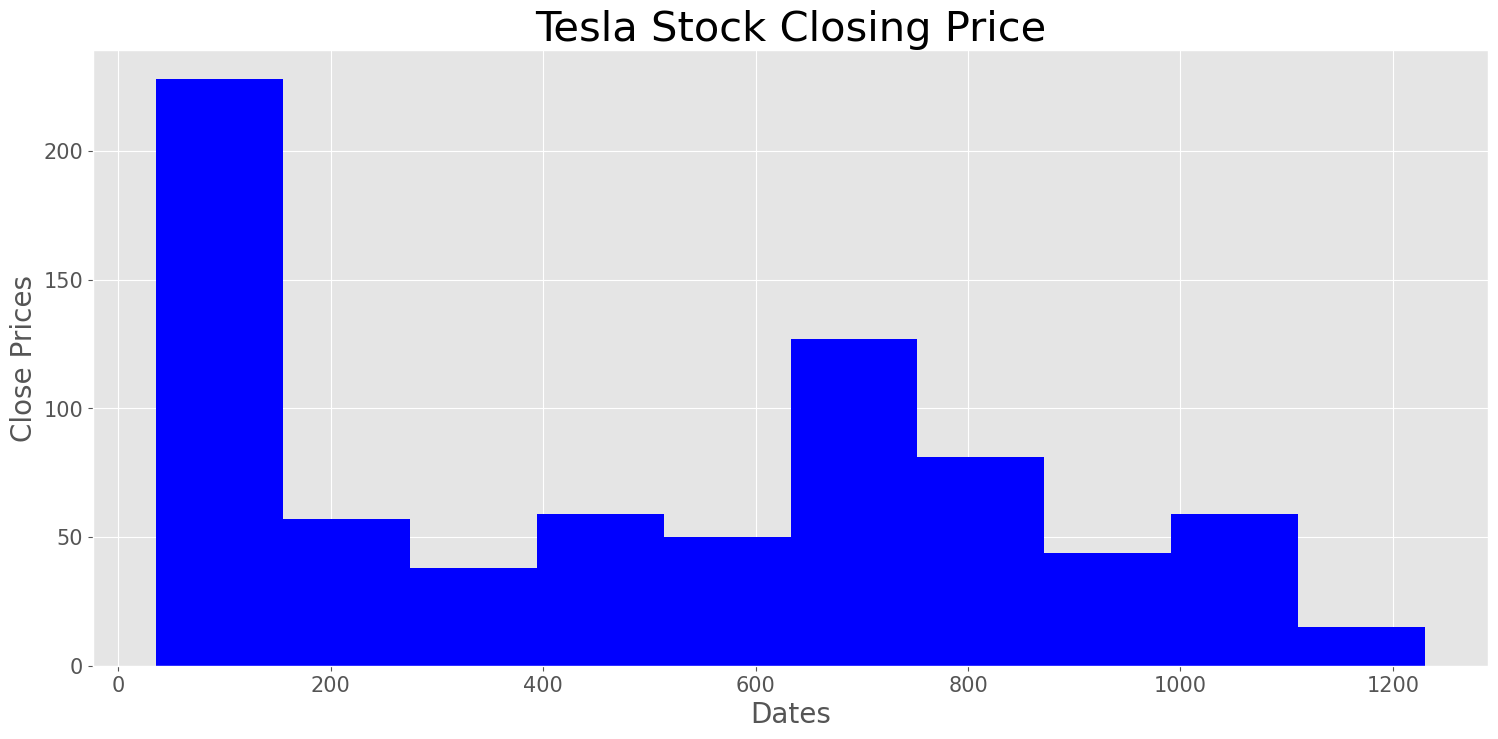

In [20]:
# plotting close price 

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price', fontsize=30)
plt.show()

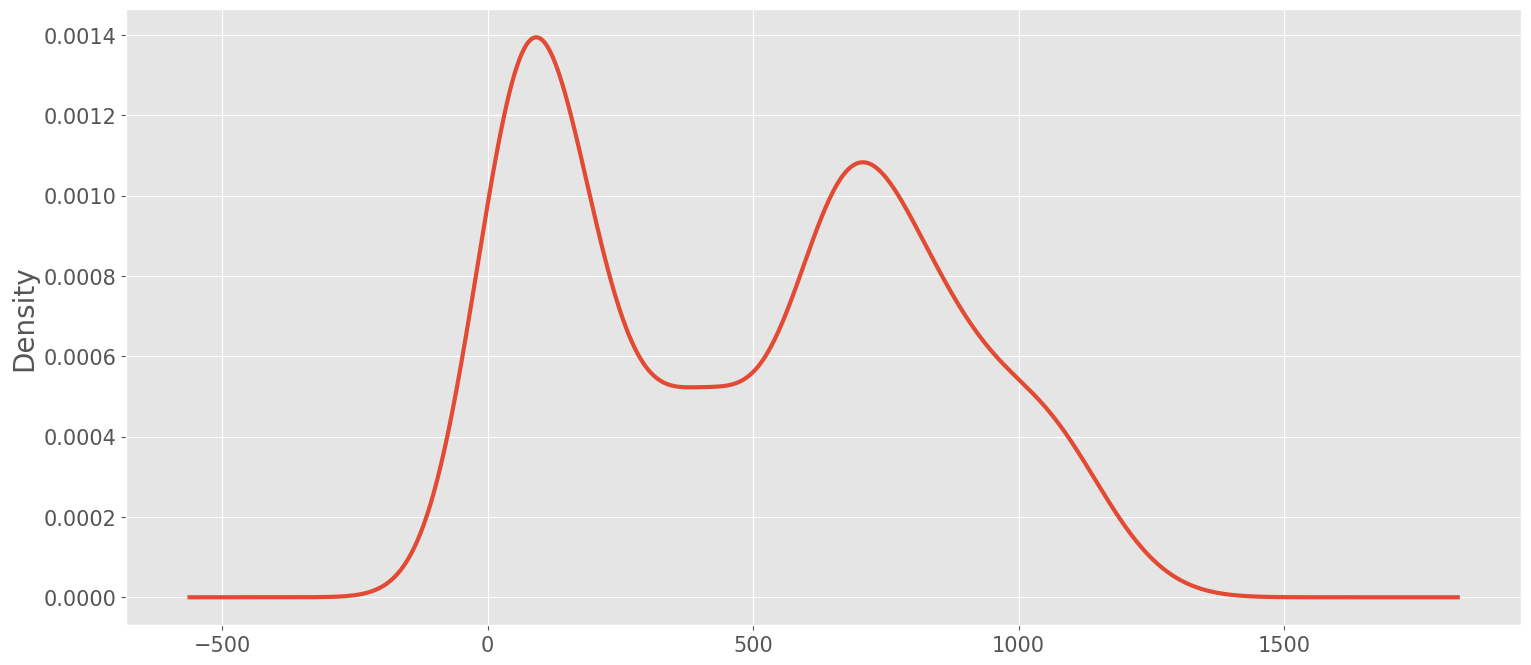

In [21]:
# Distribution of the close price

df_close = stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8), linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density', fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [22]:
# setting window size

stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [23]:
stock_data['Close'].rolling(12).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [24]:
stock_data['Close'].rolling(3).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [25]:
stock_data['Close'].rolling(12).mean().head(13)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
2019-05-29          NaN
2019-05-30          NaN
2019-05-31          NaN
2019-06-03          NaN
2019-06-04          NaN
2019-06-05          NaN
2019-06-06    38.516334
2019-06-07    38.506667
Name: Close, dtype: float64

In [26]:
roll_mean = stock_data['Close'].rolling(3).mean()

In [28]:
roll_std = stock_data['Close'].rolling(3).std()

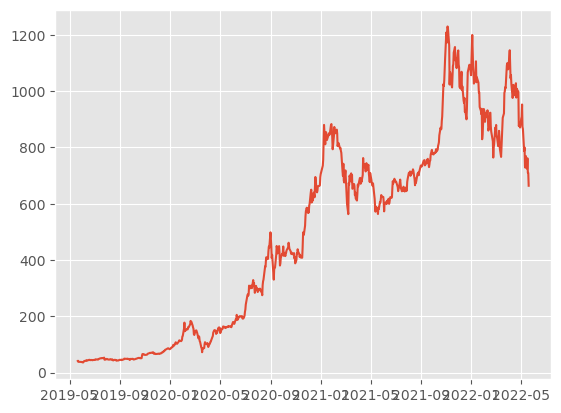

In [29]:
plt.plot(stock_data.Close)

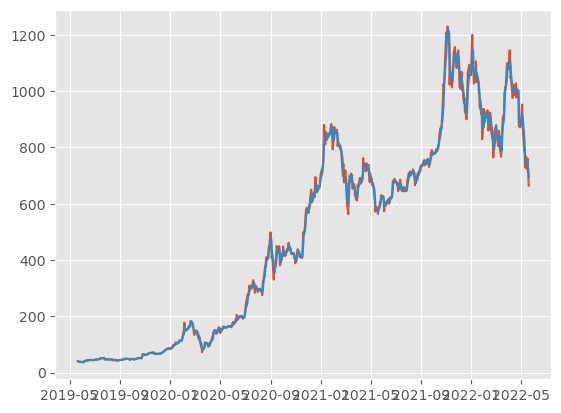

In [30]:
plt.plot(stock_data.Close)
plt.plot(roll_mean)

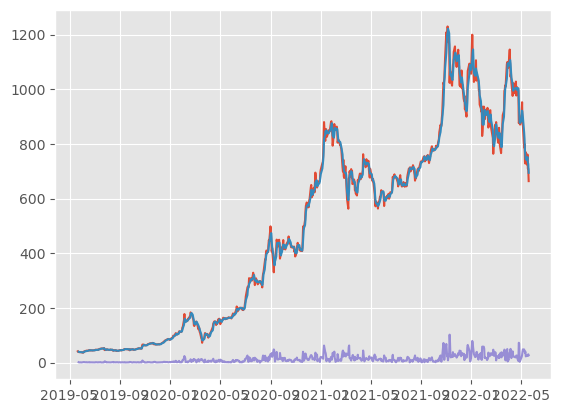

In [31]:
plt.plot(stock_data.Close)
plt.plot(roll_mean)
plt.plot(roll_std)

In [32]:
roll_mean = stock_data['Close'].rolling(120).mean()
roll_std = stock_data['Close'].rolling(120).std()

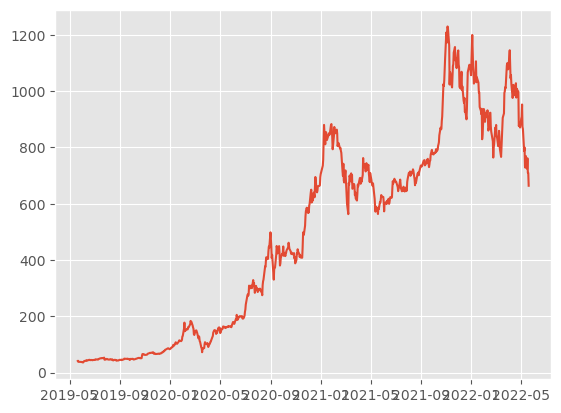

In [33]:
plt.plot(stock_data.Close)

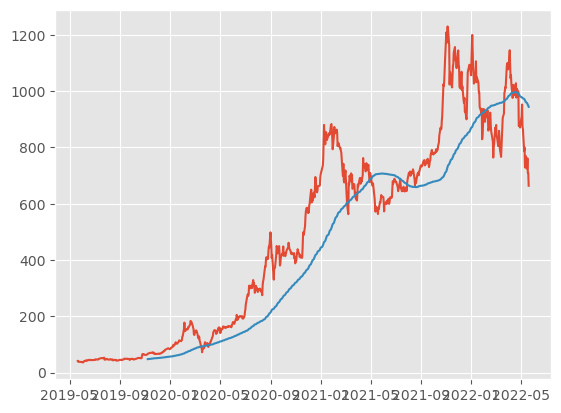

In [34]:
plt.plot(stock_data.Close)
plt.plot(roll_mean)

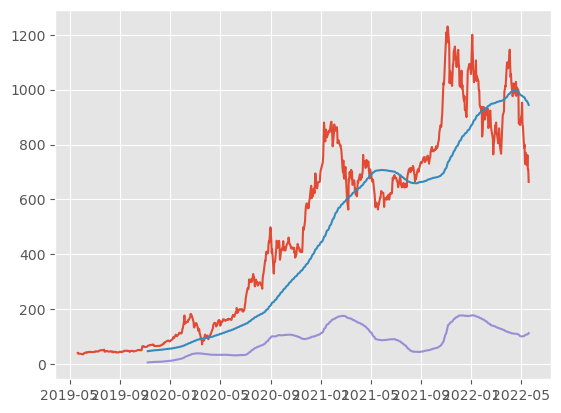

In [35]:
plt.plot(stock_data.Close)
plt.plot(roll_mean)
plt.plot(roll_std)

In [36]:
roll_mean = stock_data['Close'].rolling(300).mean()
roll_std = stock_data['Close'].rolling(300).std()

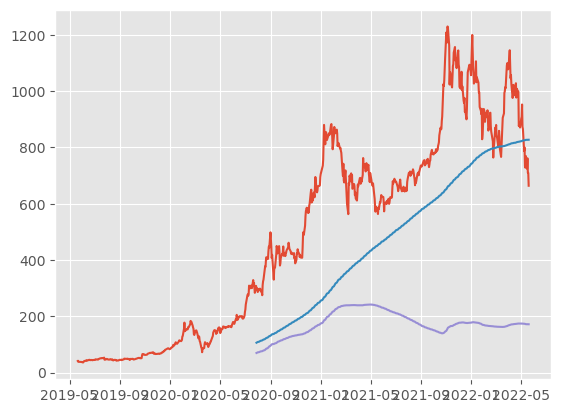

In [37]:
plt.plot(stock_data.Close)
plt.plot(roll_mean)
plt.plot(roll_std)

In [40]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [44]:
pd.Series(adft[0:4], index = ['test stats','p value','lag','data points'])

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [56]:
# Test for stationarty 

def test_stationarity(timmeseries) :
    # determining rolling statistics
    rolmean = stock_data.rolling(48).mean() # rolling mean
    rolstd = stock_data.rolling(48).std() # rolling standard deviation
    # plot rolling statistics
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(stock_data,color='blue',label='Original',linewidth=3)
    plt.plot(rolmean,color='red',label='Rolling Mean',linewidth=3)
    plt.plot(rolstd,color='black',label='Rolling Std',linewidth=4)
    plt.legend(loc='best',fontsize=20, shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of the Dicky-Fuller Test")
    adft = adfuller(stock_data,autolag='AIC')
    # output for adft will give us without defining what the values are 
    # hence we manually write what values does iot explains using s for loop
    output= pd.Series(adft[0:4],index=['Test Statistics','P-Values','No of lags used', 'Number of data points'])
    for key,values in adft[4].items() :
        output['critical value (%s)'%key] = values
    print(output)
    

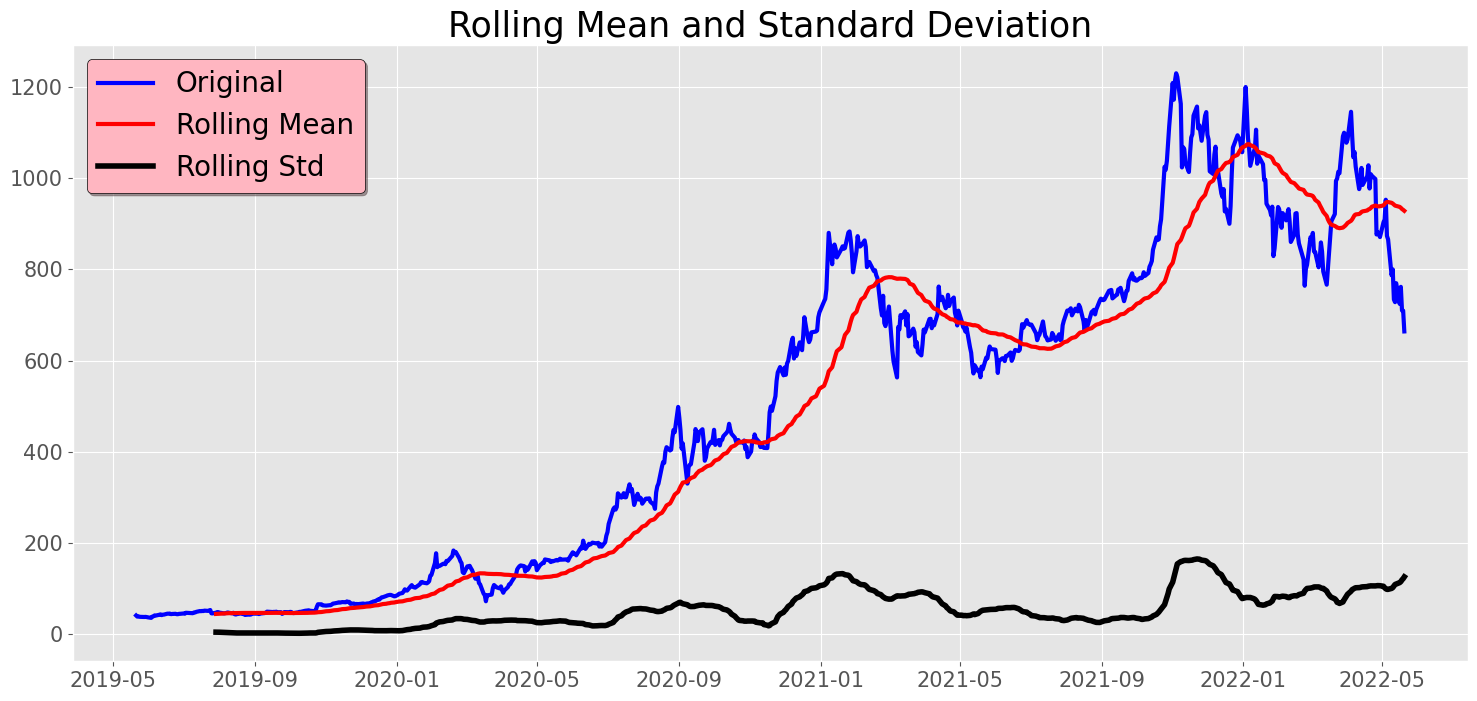

Results of the Dicky-Fuller Test
Test Statistics           -1.363009
P-Values                   0.599876
No of lags used            9.000000
Number of data points    748.000000
critical value (1%)       -3.439123
critical value (5%)       -2.865412
critical value (10%)      -2.568832
dtype: float64


In [57]:
test_stationarity(stock_data.Close)

### FINDING OUTLIERS

<AxesSubplot: >

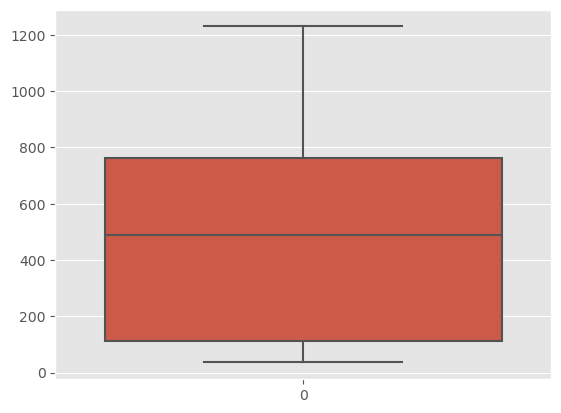

In [58]:
sns.boxplot(stock_data.Close)

### TIME SERIES DECOMPOSITION

In [60]:
# importing function for decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']],period=12)

In [64]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

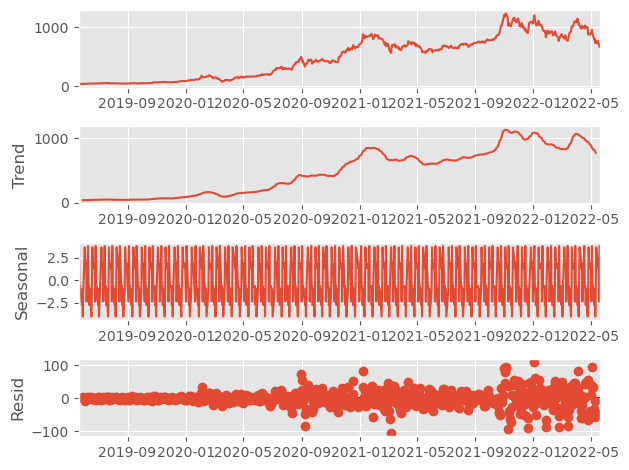

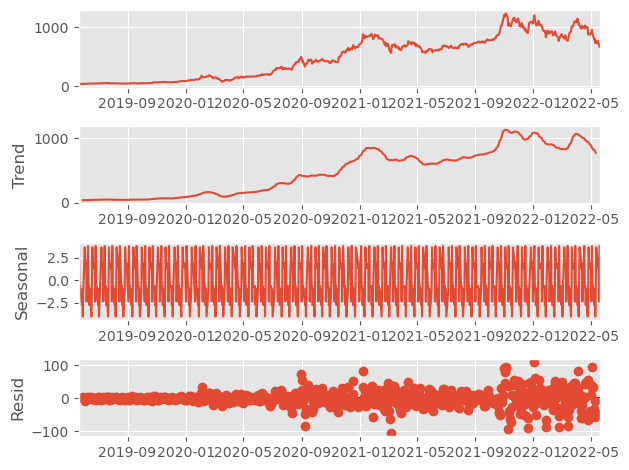

In [63]:
result.plot()